In [1]:
import networkx as nx
import random
import numpy as np
import pandas as pd
from network_build import *
import matplotlib.pyplot as plt

In [14]:
driver = pd.read_csv("..//..//..//Database//NYC_trip//driver_260.csv", index_col=0)
order = pd.read_csv("..//..//..//Database//NYC_trip//order_clean_260.csv", index_col=0)
area = np.load("..//..//..//Database//NYC_area//NY_area.npy")

In [18]:
order["call_time"] = pd.to_datetime(order["call_time"])
order["end_time"] = pd.to_datetime(order["end_time"])
start_time = pd.to_datetime("2022-06-01 06:00:00 AM")
end_time = pd.to_datetime("2022-06-01 06:30:00 AM")
order_pick = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]
order_pick = order_pick[["sid", "call_time", "eid", "end_time"]]
order_pick = order_pick.values
driver["time"] = pd.date_range(start=start_time, end=start_time, periods=len(driver))
driver.columns = ["id", "time"]
driver_pick = driver.values
print(len(order_pick))

892


In [27]:
net = ConstructNetwork(order_pick, driver_pick, area, void = 10)
G_full = net.build_network(network_type="full")
G_order = net.build_network(network_type="order")
df = net.network_metrics(G_order)

In [28]:
len(G_full.nodes()), len(G_full.edges()), len(G_order.nodes()), len(G_order.edges())

(2786, 20372)

<AxesSubplot: >

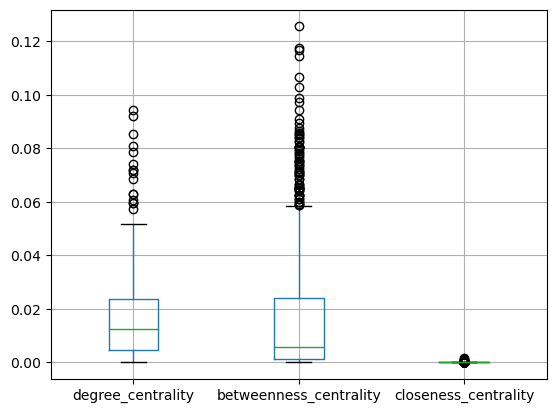

In [25]:
df.boxplot()